# classification tasks such as brand classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
def read_data():
    data = pd.read_csv(r"C:\Users\dell\Downloads\Car_Rates.csv")
    return data
data = read_data()

In [3]:
(data.head())

,Car_name,Num_of_reviews,General_rate,Comfort,Interior design,Performance,Value for the money,Exterior styling,Reliability,Year,Brand,Model
0,2023 Acura Integra.,5.0,4.6,4.4,4.4,4.6,4.2,5.0,4.8,2023,Acura,Integra.
1,2023 Acura MDX.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Acura,MDX.
2,2023 Acura TLX.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Acura,TLX.
3,2023 Acura RDX.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Acura,RDX.
4,2022 Acura TLX.,3.0,4.8,4.3,4.3,4.7,5.0,5.0,5.0,2022,Acura,TLX.


In [4]:
print(data.shape)

(4243, 12)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4243 entries, 0 to 4242
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car_name             4243 non-null   object 
 1   Num_of_reviews       3679 non-null   float64
 2   General_rate         3679 non-null   float64
 3   Comfort              3679 non-null   float64
 4   Interior design      3679 non-null   float64
 5   Performance          3679 non-null   float64
 6   Value for the money  3679 non-null   float64
 7   Exterior styling     3679 non-null   float64
 8   Reliability          3664 non-null   float64
 9   Year                 4243 non-null   int64  
 10  Brand                4243 non-null   object 
 11  Model                4243 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 397.9+ KB
None


In [6]:
print(data.describe())

       Num_of_reviews  General_rate      Comfort  Interior design  \
count     3679.000000   3679.000000  3679.000000      3679.000000   
mean        55.579777      4.626964     4.654879         4.625768   
std         88.706870      0.335025     0.362777         0.359572   
min          1.000000      1.000000     1.000000         1.000000   
25%          6.000000      4.500000     4.500000         4.500000   
50%         22.000000      4.700000     4.700000         4.700000   
75%         67.000000      4.800000     4.900000         4.800000   
max       1024.000000      5.000000     5.000000         5.000000   

       Performance  Value for the money  Exterior styling  Reliability  \
count  3679.000000          3679.000000       3679.000000  3664.000000   
mean      4.616716             4.479179          4.718211     4.629367   
std       0.408755             0.437597          0.313698     0.425183   
min       1.000000             1.000000          1.000000     1.000000   
25%     

In [7]:
print(data.dtypes)

Car_name                object
Num_of_reviews         float64
General_rate           float64
Comfort                float64
Interior design        float64
Performance            float64
Value for the money    float64
Exterior styling       float64
Reliability            float64
Year                     int64
Brand                   object
Model                   object
dtype: object


In [8]:
data['year']=2023      ##  Creating a new Column of Current Year

In [9]:
data['Year1']= data['year']-data['Year']        ##  Now we have data about how old model are.

In [10]:
data.head(10)

,Car_name,Num_of_reviews,General_rate,Comfort,Interior design,Performance,Value for the money,Exterior styling,Reliability,Year,Brand,Model,year,Year1
0,2023 Acura Integra.,5.0,4.6,4.4,4.4,4.6,4.2,5.0,4.8,2023,Acura,Integra.,2023,0
1,2023 Acura MDX.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Acura,MDX.,2023,0
2,2023 Acura TLX.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Acura,TLX.,2023,0
3,2023 Acura RDX.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Acura,RDX.,2023,0
4,2022 Acura TLX.,3.0,4.8,4.3,4.3,4.7,5.0,5.0,5.0,2022,Acura,TLX.,2023,1
5,2022 Acura MDX.,19.0,4.7,4.8,4.6,4.7,4.6,4.9,4.6,2022,Acura,MDX.,2023,1
6,2022 Acura RDX.,2.0,4.8,5.0,5.0,4.5,5.0,4.5,5.0,2022,Acura,RDX.,2023,1
7,2022 Acura ILX.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,Acura,ILX.,2023,1
8,2022 Acura NSX.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,Acura,NSX.,2023,1
9,2021 Acura ILX.,3.0,4.9,4.7,4.7,5.0,5.0,4.7,5.0,2021,Acura,ILX.,2023,2


In [11]:
data.drop('year',axis=1,inplace=True)    ## now we are deleting (year) column

In [12]:
print(data['Brand'].value_counts())

BMW              436
Mercedes-Benz    342
Audi             281
Ford             270
Toyota           263
Chevrolet        238
Nissan           222
Lexus            212
Hyundai          164
Kia              144
Honda            136
Volkswagen       130
GMC              119
Volvo            111
Porsche          106
Cadillac         101
Subaru           100
Jeep              94
INFINITI          90
RAM               87
Mazda             85
Lincoln           79
Acura             72
Land              70
Dodge             68
Buick             63
Mitsubishi        62
Jaguar            50
Chrysler          47
Tesla              1
Name: Brand, dtype: int64


In [13]:
data['Num_of_reviews'].mode()

0    1.0
Name: Num_of_reviews, dtype: float64

In [14]:
data['Num_of_reviews'].fillna(1,inplace=True)

In [15]:
data['General_rate'].mode()

0    4.7
Name: General_rate, dtype: float64

In [16]:
data['General_rate'].fillna(4.6,inplace=True)

In [17]:
data['Comfort'].mode()

0    5.0
Name: Comfort, dtype: float64

In [18]:
data['Comfort'].fillna(5.0,inplace=True)

In [19]:
data['Interior design'].mean()

4.625767871704267

In [20]:
data['Interior design'].fillna(4.6,inplace=True)

In [21]:
data['Performance'].mean()

4.616716499048655

In [22]:
data['Performance'].fillna(4.6,inplace=True)

In [23]:
data['Value for the money'].mean()

4.479179124762163

In [24]:
data['Value for the money'].fillna(4.3,inplace=True)

In [25]:
data['Exterior styling'].mean()

4.718211470508291

In [26]:
data['Exterior styling'].fillna(4.7,inplace=True)

In [27]:
data['Reliability'].mean()

4.629366812227074

In [28]:
data['Reliability'].fillna(4.6,inplace=True)

In [29]:
                                            ###    All the missing values filled by their mean   

In [30]:
data.isnull().sum()                # Now our data is cleaned

Car_name               0
Num_of_reviews         0
General_rate           0
Comfort                0
Interior design        0
Performance            0
Value for the money    0
Exterior styling       0
Reliability            0
Year                   0
Brand                  0
Model                  0
Year1                  0
dtype: int64

In [31]:
data.head()

,Car_name,Num_of_reviews,General_rate,Comfort,Interior design,Performance,Value for the money,Exterior styling,Reliability,Year,Brand,Model,Year1
0,2023 Acura Integra.,5.0,4.6,4.4,4.4,4.6,4.2,5.0,4.8,2023,Acura,Integra.,0
1,2023 Acura MDX.,1.0,4.6,5.0,4.6,4.6,4.3,4.7,4.6,2023,Acura,MDX.,0
2,2023 Acura TLX.,1.0,4.6,5.0,4.6,4.6,4.3,4.7,4.6,2023,Acura,TLX.,0
3,2023 Acura RDX.,1.0,4.6,5.0,4.6,4.6,4.3,4.7,4.6,2023,Acura,RDX.,0
4,2022 Acura TLX.,3.0,4.8,4.3,4.3,4.7,5.0,5.0,5.0,2022,Acura,TLX.,1


In [32]:
data['Model'].nunique()        #   There are so many unique value so we can't drop this 

742

In [33]:
lb = LabelEncoder()

In [34]:
data['model'] = lb.fit_transform(data['Model'])

In [35]:
data.head()                ##  Now our Model column converted into numbers

,Car_name,Num_of_reviews,General_rate,Comfort,Interior design,Performance,Value for the money,Exterior styling,Reliability,Year,Brand,Model,Year1,model
0,2023 Acura Integra.,5.0,4.6,4.4,4.4,4.6,4.2,5.0,4.8,2023,Acura,Integra.,0,351
1,2023 Acura MDX.,1.0,4.6,5.0,4.6,4.6,4.3,4.7,4.6,2023,Acura,MDX.,0,402
2,2023 Acura TLX.,1.0,4.6,5.0,4.6,4.6,4.3,4.7,4.6,2023,Acura,TLX.,0,634
3,2023 Acura RDX.,1.0,4.6,5.0,4.6,4.6,4.3,4.7,4.6,2023,Acura,RDX.,0,521
4,2022 Acura TLX.,3.0,4.8,4.3,4.3,4.7,5.0,5.0,5.0,2022,Acura,TLX.,1,634


In [36]:
data.drop('Model',axis=1,inplace=True)     ##  we deleted Model column

In [37]:
data.drop('Car_name',axis=1,inplace=True)

In [38]:
data.dtypes

Num_of_reviews         float64
General_rate           float64
Comfort                float64
Interior design        float64
Performance            float64
Value for the money    float64
Exterior styling       float64
Reliability            float64
Year                     int64
Brand                   object
Year1                    int64
model                    int32
dtype: object

array([[<Axes: title={'center': 'Num_of_reviews'}>,
        <Axes: title={'center': 'General_rate'}>,
        <Axes: title={'center': 'Comfort'}>],
       [<Axes: title={'center': 'Interior design'}>,
        <Axes: title={'center': 'Performance'}>,
        <Axes: title={'center': 'Value for the money'}>],
       [<Axes: title={'center': 'Exterior styling'}>,
        <Axes: title={'center': 'Reliability'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Year1'}>,
        <Axes: title={'center': 'model'}>, <Axes: >]], dtype=object)

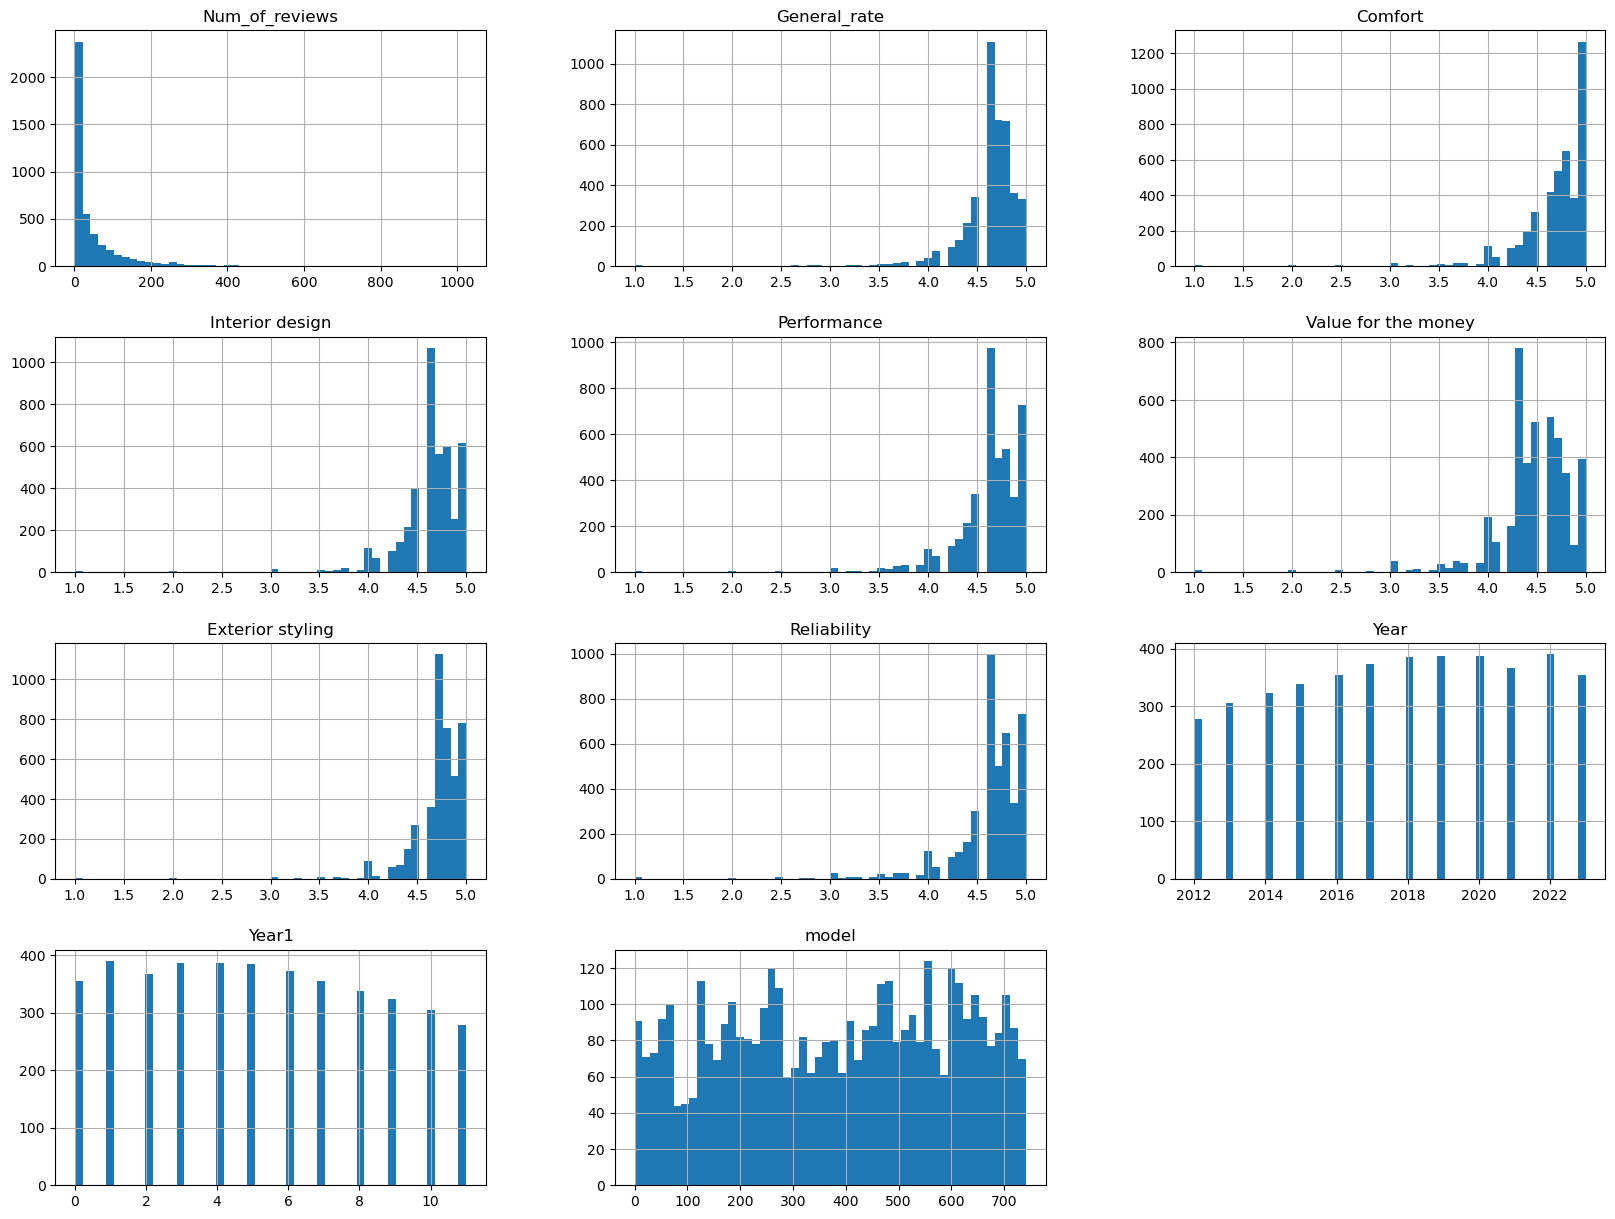

In [39]:
data.hist(bins=50,figsize=(20,15))

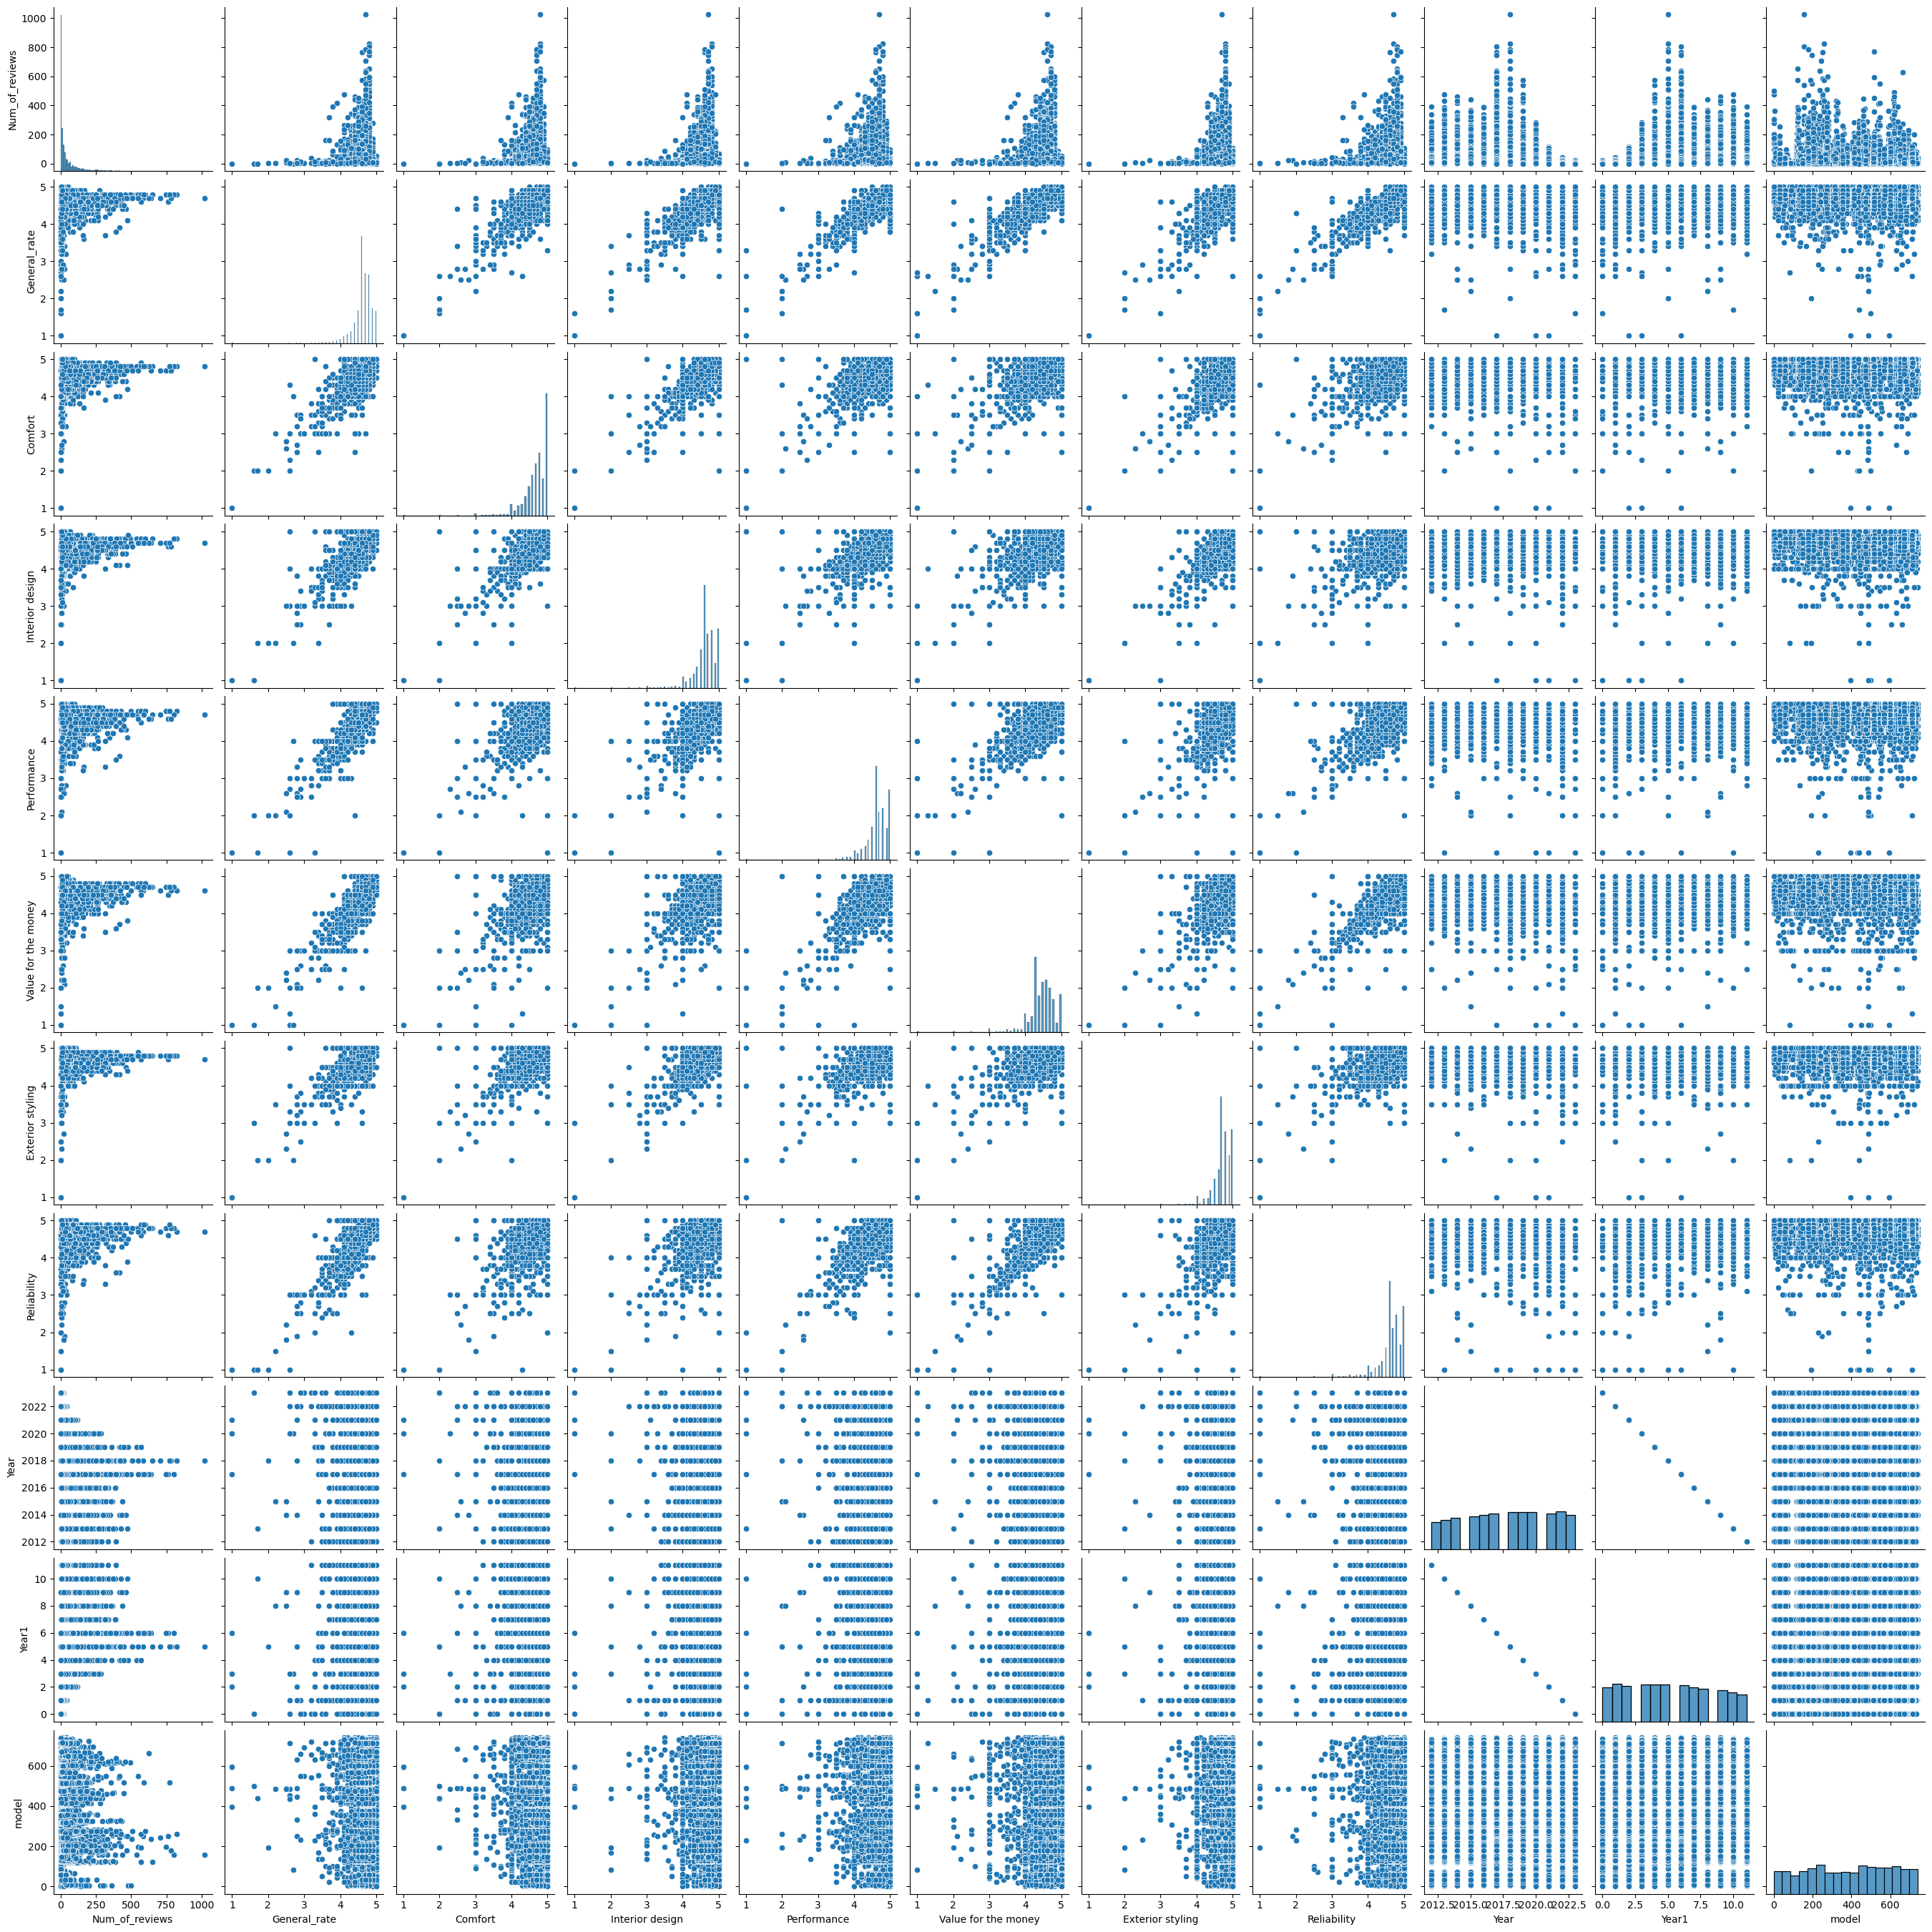

In [40]:
sns.pairplot(data)

In [41]:
x = data[['Num_of_reviews', 'General_rate', 'Comfort','Interior design', 'Performance','Value for the money','Exterior styling', 'Reliability', 'Year','Year1','model']]

In [42]:
y = data['Brand']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [44]:
model = DecisionTreeClassifier()

In [45]:
model_train = model.fit(x_train,y_train)

In [46]:
pred = model_train.predict(x_test)

In [47]:
accuracy_score(y_test,pred)

0.9481743227326266

<Axes: >

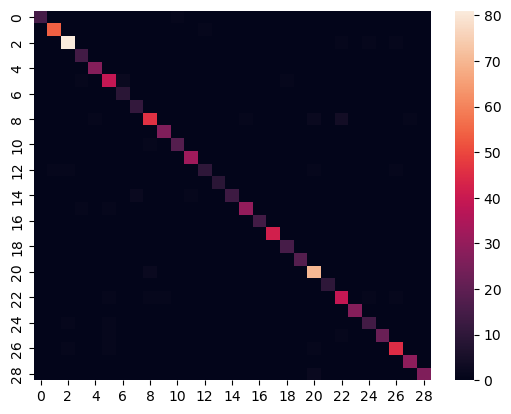

In [48]:
sns.heatmap(confusion_matrix(y_test,pred))

In [50]:
round(accuracy_score(y_test,pred)*100,2)

94.82

In [ ]:
##  So our accuracy of the model is around 95% it's means our model is working good  
##  We have done all the thingh which are required 
